In [1]:
import pickle as pkl
import numpy as np

path = "."
filename = "crowd_dict.pkl"

In [2]:
with open("%s/%s"%(path,filename),"rb") as _in:
    similarity_dataset = pkl.load(_in)


In [3]:
"""
Author's Note:
This code aligns the textual description with the video clips. In order to get the textual
  description corresponding to key #5 in the similarity dataset, simply call phrase_lookup[5]
"""

import pandas as pd # Pandas library enables data manipulation
data_url = "../revisedBDDX.csv"
def load_bddx_data(csv_name):
    column_names = ['Index', 'InputVideo', '1S', '1E', '1A', '1J', '2S', '2E', '2A', '2J', '3S', '3E', '3A', '3J',
                    '4S', '4E', '4A', '4J','5S', '5E', '5A', '5J','6S', '6E', '6A', '6J','7S', '7E', '7A', '7J',
                    '8S', '8E', '8A', '8J','9S', '9E', '9A', '9J','10S', '10E', '10A', '10J','11S', '11E', '11A', '11J',
                    '12S', '12E', '12A', '12J','13S', '13E', '13A', '13J','14S', '14E', '14A', '14J','15S', '15E', '15A', '15J']
    
    return pd.read_csv(csv_name, names=column_names)

bddx = load_bddx_data(data_url)
bddx = bddx.drop(['1S', '1E','2S', '2E','3S', '3E','4S', '4E','5S', '5E','6S', '6E','7S', '7E','8S', '8E','9S', '9E','10S', '10E','11S', '11E','12S', '12E','13S', '13E','14S', '14E','15S', '15E', ], axis=1)
bddx = bddx.fillna("")

bddx['1AJ'] = bddx[['1A', '1J']].agg(' '.join, axis=1)
bddx['2AJ'] = bddx[['2A', '2J']].agg(' '.join, axis=1)
bddx['3AJ'] = bddx[['3A', '3J']].agg(' '.join, axis=1)
bddx['4AJ'] = bddx[['4A', '4J']].agg(' '.join, axis=1)
bddx['5AJ'] = bddx[['5A', '5J']].agg(' '.join, axis=1)
bddx['6AJ'] = bddx[['6A', '6J']].agg(' '.join, axis=1)
bddx['7AJ'] = bddx[['7A', '7J']].agg(' '.join, axis=1)
bddx['8AJ'] = bddx[['8A', '8J']].agg(' '.join, axis=1)
bddx['9AJ'] = bddx[['9A', '9J']].agg(' '.join, axis=1)
bddx['10AJ'] = bddx[['10A', '10J']].agg(' '.join, axis=1)
bddx['11AJ'] = bddx[['11A', '11J']].agg(' '.join, axis=1)
bddx['12AJ'] = bddx[['12A', '12J']].agg(' '.join, axis=1)
bddx['13AJ'] = bddx[['13A', '13J']].agg(' '.join, axis=1)
bddx['14AJ'] = bddx[['14A', '14J']].agg(' '.join, axis=1)
bddx['15AJ'] = bddx[['15A', '15J']].agg(' '.join, axis=1)

bddx = bddx.drop(['Index', '1A', '1J', '2A', '2J', '3A', '3J', '4A', '4J', '5A', '5J', '6A', '6J', '7A', '7J', '8A', '8J', '9A', '9J', '10A', '10J', '11A', '11J', '12A', '12J', '13A', '13J', '14A', '14J', '15A', '15J', ], axis=1)
bddx = bddx.drop(bddx.index[0])

sdlList = []
for index, row in bddx.iterrows():
    sdlList.append(row.astype(str))
    
sdlStatements = []
for i in range(len(sdlList)):
    sdlStatements.append({'1': sdlList[i]['1AJ'], '2': sdlList[i]['2AJ'], '3': sdlList[i]['3AJ'], '4': sdlList[i]['4AJ'], 
                        '5': sdlList[i]['5AJ'], '6': sdlList[i]['6AJ'], '7': sdlList[i]['7AJ'], '8': sdlList[i]['8AJ'], 
                        '9': sdlList[i]['9AJ'], '10': sdlList[i]['10AJ'], '11': sdlList[i]['11AJ'], '12': sdlList[i]['12AJ'], 
                        '13': sdlList[i]['13AJ'], '14': sdlList[i]['14AJ'], '15': sdlList[i]['15AJ']})

phrase_lookup = []

for i in range(len(sdlStatements)):
    keysTemp = list(sdlStatements[i].keys())
    for j in keysTemp:
        if (sdlStatements[i][j]==" "):
            continue
        else:
            phrase_lookup.append(sdlStatements[i][j])


In [27]:
# Debugging code, delete before pushing -AH
sample = 10109

print(phrase_lookup[sample])
for i,comparison in enumerate(similarity_dataset[sample]):
    print("%s (%i)"%(phrase_lookup[comparison],gt[sample][i]))

print(gt[sample])
print(metric_ranks['onehot'][sample])
print(metric_ranks['bleu4'][sample])

The car is stopped due to the red light.
The car is stopped because the light is red. (0)
The car is stopped because the light is red. (1)
The car is stopped because the light is red. (2)
The car is stopping because it has reached a red light at an intersection. (5)
The stops. The car in front of it is stopped at the red light. (3)
The car is stopped because it's waiting for the light to change. (4)
[0, 1, 2, 5, 3, 4]
[3, 4, 5, 0, 1, 2]
[0, 1, 2, 5, 4, 3]


In [ ]:
!pip install nltk==3.5

     |████████████████████████████████| 1.4MB 2.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=2363641e49faeaf025691d1075b39fc625b06de2996279cb7bbffcd047030ecf
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [140]:
# TODO: This is where metric stuff will go

import nltk.translate.bleu_score as bleu
from nltk.translate.bleu_score import SmoothingFunction
import nltk.translate.meteor_score as meteor
import nltk
from math import ceil
nltk.download('wordnet')

def read_embeddings(embeddings_path):
    """Arguments:
        - embeddings_path: path to the embeddings
    """
    with open(embeddings_path, 'r') as in_stream:
        embeddings = []
        for line in in_stream:
            line = '['+line.replace(' ',',')+']'
            embeddings.append(eval(line))
        print("Embeddings loaded")
        return embeddings
    return []

def load_from_file(filename,page_size=1000):
    path = "/Volumes/External HD/Deep Learning"

    with open("%s/%s_%i.pkl"%(path,filename,0),"rb") as _init_in:
        init_matrix = pkl.load(_init_in)

    page_size = init_matrix.shape[0]
    matrix_size = init_matrix.shape[1]

    output = np.zeros((matrix_size,matrix_size))
    output[0:page_size] = init_matrix

    for i in range(1,ceil(matrix_size/page_size)):
        with open("%s/%s_%i.pkl"%(path,filename,i),"rb") as _init_in:
            init_matrix = pkl.load(_init_in)
        output[i*page_size:(i+1)*page_size] = init_matrix
    
    print("File loaded")
    return output

def onehot_metric(a,b):
    global sdl_matrix
    if not 'sdl_matrix' in globals():
        sdl_matrix = load_from_file("sdl_dist")
    return sdl_matrix[a][b]
    
def condensed_metric(a,b):
    global sdl_matrix
    if not 'sdl_matrix' in globals():
        sdl_matrix = load_from_file("condensed_weighted_dist")
    return sdl_matrix[a][b]

def sent2vec_metric(a,b): # a and b should be indices taken from similarity_dataset
    global embeddings
    if not 'embeddings' in globals():
        embeddings = np.array(read_embeddings("../bddx_embeddings.txt"))
    return np.linalg.norm(embeddings[a]-embeddings[b]) # Euclidean Distance

def bleu4_metric(a, b):
    reference = [phrase_lookup[a].split()]
    candidate = phrase_lookup[b].split()
    smoothie = SmoothingFunction().method1
    return 1.0-(bleu.sentence_bleu(reference, candidate, smoothing_function = smoothie, weights=[.25, .25, .25, .25]))

def bleu1_metric(a, b):
    reference = [phrase_lookup[a].split()]
    candidate = phrase_lookup[b].split()
    smoothie = SmoothingFunction().method5
    return 1.0-(bleu.sentence_bleu(reference, candidate, smoothing_function = smoothie, weights=[1, 0, 0, 0]))

def bleu_metric(a, b):
    reference = [phrase_lookup[a].split()]
    candidate = phrase_lookup[b].split()
    smoothie = SmoothingFunction().method5
    return 1.0-(bleu.sentence_bleu(reference, candidate, smoothing_function = smoothie, weights=[0.5, 0.5, 0, 0]))

def meteor_metric(a, b):
    return 1.0-meteor.single_meteor_score(phrase_lookup[a], phrase_lookup[b], alpha=.9, beta=5, gamma=0.9)




[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aronharder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [106]:
def sanity(a, b):
    #reference = [a.split()]
    #candidate = b.split()
    #return bleu.sentence_bleu(reference, candidate, weights=[0.25,0.25,0.25,0.25])
    return meteor.single_meteor_score(a, b, alpha=.9, beta=5, gamma=0.9)


s1 = "This is a sentence"
s2 = "This is also sentence"

print(sanity(s1,s2))
print(meteor_metric(0,5))


0.6611111111111112
0.968421052631579
The car accelerates because the light has turned green.
The car is stopped. The car is at an intersection with a red light.


Quick experiment i ran: i computed the metrics for an example in the similarity dataset, and got rankings as returned by a human (me), and then from the metrics. I did this to test out the kendall tau ranking system which can be found below

In [ ]:
base = phrase_lookup[1322]
ref1 = phrase_lookup[8027]
ref2 = phrase_lookup[6459]
ref3 = phrase_lookup[9951]
ref4 = phrase_lookup[16541]
ref5 = phrase_lookup[21116]
ref6 = phrase_lookup[4340]
print('base: ', base)
print(ref1)
print(ref2)
print(ref3)
print(ref4)
print(ref5)
print(ref6)
ranking = [5, 0, 1, 4, 3, 2]

base:  The car continues to drive forward. The car drives forward because there are no other cars or lights in its path.
The car drives forward because there are no cars in front of it.
The car drives forward because there are no nearby cars in its lane.
The car is driving quickly down the dark road because there is no traffic and all the lights are green.
The car speeds down the road because the lights are green and yellow.
The car is driving in the middle lane because all the lights are green.
The car drives forward because there are no other cars on the road.


In [ ]:
# Groundtruth: base: 
print('BLEU1_METRIC')
print(bleu1_metric(1322, 4340))
print(bleu1_metric(1322, 8027))
print(bleu1_metric(1322, 6459))
print(bleu1_metric(1322, 21116))
print(bleu1_metric(1322, 16541))
print(bleu1_metric(1322, 9951))
bleu1_ranking = [1, 5, 2, 0, 4, 3]
# 6459 = 1, 4340 = 5, 8027 = 0, 9951 = 2, 2116 = 4, 16541 = 3

print('BLEU_METRIC')
print(bleu_metric(1322, 4340))
print(bleu_metric(1322, 8027))
print(bleu_metric(1322, 6459))
print(bleu_metric(1322, 21116))
print(bleu_metric(1322, 16541))
print(bleu_metric(1322, 9951))
bleu_ranking = [5, 1, 0, 2, 4, 3] 

print('BLEU4_METRIC')
print(bleu4_metric(1322, 4340))
print(bleu4_metric(1322, 8027))
print(bleu4_metric(1322, 6459))
print(bleu4_metric(1322, 21116))
print(bleu4_metric(1322, 16541))
print(bleu4_metric(1322, 9951))
bleu4_ranking = [5, 1, 0, 2, 4, 3]

print('METEOR_METRIC')
print(meteor_metric(1322, 4340))
print(meteor_metric(1322, 8027))
print(meteor_metric(1322, 6459))
print(meteor_metric(1322, 21116))
print(meteor_metric(1322, 16541))
print(meteor_metric(1322, 9951))
meteor_ranking = [5, 1, 0, 2, 4, 3]

BLEU1_METRIC
0.5923977076871624
0.5623736523267994
0.605100192647316
0.39102342897224723
0.33372892304403495
0.572406478252184
BLEU_METRIC
0.5240501824891005
0.46880390171028075
0.5041591703440566
0.23884652750815316
0.20526798546239827
0.358219625867592
BLEU4_METRIC
0.4562821362623415
0.37296378222362025
0.3908389419610675
0.0818909796416763
0.07062264282595435
0.12431709489727294
METEOR_METRIC
0.5438149750361964
0.49396683168316824
0.5438149750361964
0.04433497536945812
0.029702970297029695
0.22419090909090905


In [ ]:
base_ranking = [5, 0, 1, 4, 3, 2]
bleu1_ranking = [1, 5, 2, 0, 4, 3]
bleu_ranking = [5, 1, 0, 2, 4, 3] 
bleu4_ranking = [5, 1, 0, 2, 4, 3]
meteor_ranking = [5, 1, 0, 2, 4, 3]

In [143]:
"""
Author's Note:
How to change this code:
  Simply change "metric = sent2vec_metric" to a different metric function. The metric function
  should take as input two indices taken from the similarity_dataset.
How to read metric_output:
  For a given base index (e.g., 15096), it shows which ranking each video has under the metric
  e.g., [1,0,2,5,3,4] mean that the second video (index 23555) is the most similar, and the
  fourth video (index 17262) is the least similar.
"""

with open("groundtruth.pkl","rb") as _in:
    gt = pkl.load(_in)

metric_output = {}
metric_name = "bleu4"
metric = bleu4_metric # This should be a function that takes two indices as inputs

for base in similarity_dataset:
    metric_output[base] = [0]*len(similarity_dataset[base])
    output = []
    for comparison in similarity_dataset[base]:
        output.append( metric(base,comparison) )
    order = np.argsort(output)
    skip = 0
    for i,sort_order in enumerate(order):
        if skip > 0: # Skip videos that were already processed by the score
            skip-=1
            continue
        if output.count(output[sort_order]) > 1: # Multiple vids have the same score
            skip = output.count(output[sort_order])-1
            vals = list(range(i,i+skip+1))
            tie_breaker = []
            for j,value in enumerate(output):
                if value == output[sort_order]:
                    tie_breaker.append((j,gt[base][j]))
            nomatch = []
            for tie in tie_breaker:
                if tie[1] in vals:
                    vals.remove(tie[1])
                    metric_output[base][tie[0]] = tie[1]
                else:
                    nomatch.append(tie[0])
            for j,idx in enumerate(nomatch):
                metric_output[base][idx] = vals[j]
        else: # No ties in the metric score
            metric_output[base][sort_order] = i


In [39]:
# Reset file reads to run a new metric
sdl_matrix = None
del sdl_matrix
embeddings = None
del embeddings

In [ ]:
brk = 5
for key in metric_output:
    print(key)
    print(metric_output[key])
    print(similarity_dataset[key])
    brk-=1
    if brk <= 0:
        break
    

In [144]:
import os

masterfile = "master_ranks.pkl"

if os.path.isfile(masterfile):
    with open(masterfile,"rb") as _in:
        d = pkl.load(_in)
else:
    d = {}

abort = False
if metric_name in d:
    print("Metric name already exists!, Type 'y' to overwrite:")
    char = input("> ")
    abort = True
    if char == 'y':
        abort = False
        
if not abort:
    d[metric_name] = metric_output
    with open("./master_ranks.pkl","wb") as _out:
        pkl.dump(d,_out)
        
print(len(d))


Metric name already exists!, Type 'y' to overwrite:
> y
6


# RBO (NEW)

In [3]:
%pip install -e git+https://github.com/changyaochen/rbo.git@master#egg=rbo


The following command must be run outside of the IPython shell:

    $ pip install -e git+https://github.com/changyaochen/rbo.git@master#egg=rbo

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [17]:
%cd src/rbo/rbo/

/content/src/rbo/rbo


In [23]:
import rbo
'''
Note there the choice of p is of great importance, since it essentically
control the 'top-weightness'. Simply put, to an extreme, a small p value
will only consider first few items, whereas a larger p value will
consider more itmes. See Eq. (21) for quantitative measure.
'''
S = [1, 2, 3]
T = [1, 3, 2]
# Ranking Similarity function assumes p = 1.0 which is not what we want since we want to weight the top elements, whereas 1.0 just gives an intersection/overlap 
x = rbo.RankingSimilarity(S, T).rbo(p=.90)
y = rbo.RankingSimilarity(S, T).rbo(p=.98)
print(x)
print(y)

0.22599999999999995
0.049008000000000045


In [2]:
import rbo

with open("groundtruth.pkl","rb") as _in:
    gt = pkl.load(_in)

with open("master_ranks.pkl","rb") as _in:
    metric_ranks = pkl.load(_in)


In [33]:
def score(l1, l2, p=0.98):
    return rbo.RankingSimilarity(l1,l2).rbo(p=p)

metric_scores = {}
for metric in metric_ranks:
    metric_scores[metric] = []

for p in range(1,100):
    for metric in metric_ranks:
        metric_scores[metric].append([])
        metric_scores[metric][-1] = 0.0
        for sample in metric_ranks[metric]:
            l1 = list(np.argsort(gt[sample]))
            l2 = list(np.argsort(metric_ranks[metric][sample]))
            metric_scores[metric][-1]+=score(l1,l2,p=(p/100.0))
        metric_scores[metric][-1]/=len(metric_ranks[metric])

for metric in metric_scores:
    best = max(metric_scores[metric])
    print("'%s': %f at p = %i"%(metric,best,metric_scores[metric].index(best)))
    #print("'%s': %f"%(metric,metric_scores[metric][90]))


'onehot': 0.424660 at p = 66
'condensed': 0.419322 at p = 65
'sent2vec': 0.463560 at p = 66
'bleu1': 0.408005 at p = 69
'bleu4': 0.385932 at p = 70
'meteor': 0.396183 at p = 69


In [23]:
sample = 15096
sample_metric = 'onehot'

l1 = gt[sample]
l2 = metric_ranks[sample_metric][sample]
print(l1)
print(l2)
print(score(l1,l2,p=0.1))
print(score(l1,l2,p=0.65))
print("===")
l3 = list(np.argsort(gt[sample]))
l4 = list(np.argsort(metric_ranks[sample_metric][sample]))
print(l3)
print(l4)
print(score(l3,l4,p=0.1))
print(score(l3,l4,p=0.65))


[5, 2, 4, 1, 0, 3]
[4, 3, 5, 1, 0, 2]
0.0067560000000000025
0.26126431770833336
===
[4, 3, 1, 5, 2, 0]
[4, 3, 5, 1, 0, 2]
0.996981
0.8627940052083334


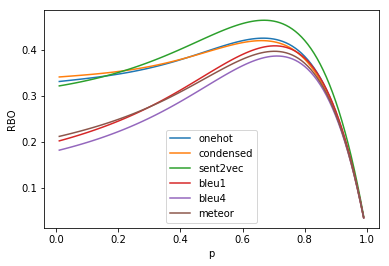

In [34]:
import matplotlib.pyplot as plt

xvals = [i/100 for i in list(range(1,100))]
plt.xlabel('p')
plt.ylabel('RBO')
for metric in metric_scores:
    plt.plot(xvals,metric_scores[metric],label=metric)
plt.legend()
plt.savefig('p_vs_rbo.pdf')
plt.show()


In [19]:
def score(l1, l2, p=0.98):
    return rbo.RankingSimilarity(l1,l2).rbo(p=p)

metric_mins = {}

for metric in metric_ranks:
    for sample in metric_ranks[metric]:
        scr = score(gt[sample],metric_ranks[metric][sample],p=0.7)
        if not metric in metric_mins:
            metric_mins[metric] = (scr,sample)
        elif scr > metric_mins[metric][0]:
            metric_mins[metric] = (scr,sample)

print(metric_mins)



{'onehot': (0.882351, 5195), 'condensed': (0.867945, 1322), 'sent2vec': (0.882351, 10109), 'bleu1': (0.882351, 10109), 'bleu4': (0.867945, 10109), 'meteor': (0.8189449999999999, 14929)}


In [17]:
sanity = 10109

print(gt[sanity])
print(metric_ranks['onehot'][sanity])
print(metric_ranks['condensed'][sanity])
#print(score(gt[sanity],metric_ranks['condensed'][sanity],p=0.7))
print(metric_ranks['sent2vec'][sanity])
print(metric_ranks['bleu4'][sanity])
print(metric_ranks['meteor'][sanity])
#print(score(gt[sanity],metric_ranks['meteor'][sanity],p=0.7))


[0, 1, 2, 5, 3, 4]
[3, 4, 5, 0, 1, 2]
[3, 4, 5, 0, 1, 2]
[0, 1, 2, 5, 3, 4]
[0, 1, 2, 5, 4, 3]
[3, 4, 5, 2, 0, 1]


# RBO (OLD)

In [ ]:

def score(l1, l2, p = 0.98):
    """
        Calculates Ranked Biased Overlap (RBO) score. 
        l1 -- Ranked List 1
        l2 -- Ranked List 2
    """
    if l1 == None: l1 = []
    if l2 == None: l2 = []
    
    sl,ll = sorted([(len(l1), l1),(len(l2),l2)])
    s, S = sl
    l, L = ll
    if s == 0: return 0

    # Calculate the overlaps at ranks 1 through l 
    # (the longer of the two lists)
    ss = set([]) # contains elements from the smaller list till depth i
    ls = set([]) # contains elements from the longer list till depth i
    x_d = {0: 0}
    sum1 = 0.0
    for i in range(l):
        x = L[i]
        y = S[i] if i < s else None
        d = i + 1
        
        # if two elements are same then 
        # we don't need to add to either of the set
        if x == y: 
            x_d[d] = x_d[d-1] + 1.0
        # else add items to respective list
        # and calculate overlap
        else: 
            ls.add(x) 
            if y != None: ss.add(y)
            x_d[d] = x_d[d-1] + (1.0 if x in ss else 0.0) + (1.0 if y in ls else 0.0)     
        #calculate average overlap
        sum1 += x_d[d]/d * pow(p, d)
        
    sum2 = 0.0
    for i in range(l-s):
        d = s+i+1
        sum2 += x_d[d]*(d-s)/(d*s)*pow(p,d)

    sum3 = ((x_d[l]-x_d[s])/l+x_d[s]/s)*pow(p,l)

    # Equation 32
    rbo_ext = (1-p)/p*(sum1+sum2)+sum3
    return rbo_ext
    
    

list1 = ['0','1','2','3','4','5']
list2 = ['1','0','2','3','4','5']
print (score(list1,list2, p = 0.98))

list1 = ['1','0','2','3','4','5']
list2 = ['1','0','2','3','5','4']
print (score(list1, list2, p = 0.98))

0.98
0.99631052736


In [ ]:
print("CUSTOM BLEU: ", score(base_ranking, bleu_ranking))
print("BLEU1: ", score(base_ranking, bleu1_ranking))
print("BLEU4: ", score(base_ranking, bleu4_ranking))
print("METEOR: ", score(base_ranking, meteor_ranking))

CUSTOM BLEU:  0.98180456736
BLEU1:  0.9554019006933333
BLEU4:  0.98180456736
METEOR:  0.98180456736


# Sent2Vec vs Condensed Comparison

In [8]:
path = "/Volumes/External HD/SDL Ranking"

with open("groundtruth.pkl","rb") as _in:
    gt = pkl.load(_in)

with open("crowd_dict.pkl","rb") as _in:
    order = pkl.load(_in)
    
with open("%s/Hier.pkl"%(path),"rb") as _in:
    sdl = pkl.load(_in)
print("sdl loaded")

with open("%s/s2v_hier.pkl"%(path),"rb") as _in:
    s2v = pkl.load(_in)
print("s2v loaded")
    
if len(sdl) != len(s2v):
    print("Warning: list lengths do not match")


In [24]:
sdl_count = [0]*6
s2v_count = [0]*6

for base in order:
    for i,comparison in enumerate(order[base]):
        if comparison in sdl[base]:
            sdl_count[gt[base][i]]+=1
        if comparison in s2v[base]:
            s2v_count[gt[base][i]]+=1
    
print(sdl_count)
print(s2v_count)


[34, 44, 40, 57, 63, 62]
[66, 56, 60, 43, 37, 38]
